In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

In [ ]:
from keras.models import Model
from keras.layers import concatenate
from keras.layers import Conv2D , MaxPool2D ,AveragePooling2D, Dense , Dropout , Flatten , Input , GlobalAveragePooling2D



def InceptionBlock(previous_layer , nbr_f1 , nbr_f2_1 , nbr_f2_2 , nbr_f3_1 , nbr_f3_2 , nbr_f4) :
    
    #Path 1
    path1 = Conv2D(filters=nbr_f1, kernel_size = (1,1), padding='same' , activation='relu')(previous_layer)
    
    #Path 2 
    path2 = Conv2D(filters=nbr_f2_1, kernel_size = (1,1), padding='same' , activation='relu')(previous_layer)
    path2 = Conv2D(filters=nbr_f2_2, kernel_size = (3,3), padding='same' , activation='relu')(path2)
    
    #Path 3
    path3 = Conv2D(filters=nbr_f3_1, kernel_size = (1,1), padding='same' , activation='relu')(previous_layer)
    path3 = Conv2D(filters=nbr_f3_1, kernel_size = (5,5), padding='same' , activation='relu')(path3)
    
    #Path 4
    path4 = MaxPool2D(pool_size=(3,3) , strides=(1,1) , padding='same') (previous_layer)
    path4 = Conv2D(filters=nbr_f4, kernel_size = (1,1), padding='same' , activation='relu')(path4)
    
    output_Layer = concatenate([path1 , path2 , path3 , path4], axis = -1)
    
    return output_Layer

def InceptionV1():
    input_layer = Input(shape = (28, 28, 1))
    resized_layer = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (224, 224)))(input_layer)
    x1 = Conv2D(filters = 64, kernel_size = (7,7), strides=2 , padding='valid' , activation='relu' )(resized_layer)
    x1 = MaxPool2D(pool_size=(3,3) , strides=2 )(x1)
    x1 = Conv2D(filters = 64, kernel_size = (1,1), strides=1 , padding='same' , activation='relu' )(x1)
    x1 = Conv2D(filters = 192, kernel_size = (3,3), strides=1 , padding='same' , activation='relu' )(x1)
    x1 = MaxPool2D(pool_size=(3,3) , strides=2 )(x1)
    x1 = InceptionBlock(previous_layer=x1, nbr_f1=64, nbr_f2_1=96, nbr_f2_2=128, nbr_f3_1=16, nbr_f3_2=32, nbr_f4=32)
    x1 = InceptionBlock(previous_layer=x1, nbr_f1=128, nbr_f2_1=128, nbr_f2_2=192, nbr_f3_1=32, nbr_f3_2=96, nbr_f4=64)
    x1 = MaxPool2D(pool_size=(3,3) , strides=2 )(x1)
    x1 = InceptionBlock(previous_layer=x1, nbr_f1=192, nbr_f2_1=96, nbr_f2_2=208, nbr_f3_1=16, nbr_f3_2=48, nbr_f4=64)
    
    x2 = AveragePooling2D(pool_size = (5,5), strides = 3)(x1)
    x2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(x2)
    x2 = Flatten()(x2)
    x2 = Dense(1024, activation = 'relu')(x2)
    x2 = Dropout(0.7)(x2)
    x2 = Dense(10, activation = 'softmax')(x2)
    
    x1 = InceptionBlock(previous_layer=x1, nbr_f1=160, nbr_f2_1=112, nbr_f2_2=224, nbr_f3_1=24, nbr_f3_2=64, nbr_f4=64)
    x1 = InceptionBlock(previous_layer=x1, nbr_f1=128, nbr_f2_1=128, nbr_f2_2=256, nbr_f3_1=24, nbr_f3_2=64, nbr_f4=64)
    x1 = InceptionBlock(previous_layer=x1, nbr_f1=112, nbr_f2_1=144, nbr_f2_2=288, nbr_f3_1=32, nbr_f3_2=64, nbr_f4=64)
    
    x3 = AveragePooling2D(pool_size = (5,5), strides = 3)(x1)
    x3 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(x3)
    x3 = Flatten()(x3)
    x3 = Dense(1024, activation = 'relu')(x3)
    x3 = Dropout(0.7)(x3)
    x3 = Dense(10, activation = 'softmax')(x3)
    
    x1 = InceptionBlock(previous_layer=x1, nbr_f1=256, nbr_f2_1=160, nbr_f2_2=320, nbr_f3_1=32, nbr_f3_2=128, nbr_f4=128)
    x1 = MaxPool2D(pool_size=(3,3) , strides=2)(x1)
    x1 = InceptionBlock(previous_layer=x1, nbr_f1=256, nbr_f2_1=160, nbr_f2_2=320, nbr_f3_1=32, nbr_f3_2=128, nbr_f4=128)
    x1 = InceptionBlock(previous_layer=x1, nbr_f1=384, nbr_f2_1=192, nbr_f2_2=384, nbr_f3_1=48, nbr_f3_2=128, nbr_f4=128)
    
    x1 = GlobalAveragePooling2D(name = 'GAPL')(x1)
    x1 = Dropout(0.4)(x1)
    x1 = Dense(units=1000, activation='relu')(x1)
    x1 = Dense(units=10, activation='softmax')(x1)
    
    model = Model(input_layer, [x1, x2, x3] , name='InceptionV1')
    return model


In [ ]:
import cv2
from keras.utils.np_utils import to_categorical

num_classes = 10
x_count = 5000
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
  trainX = trainX
  trainY = trainY
  testX = testX
  testY = testY
  print(trainX.shape)
  # reshape dataset to have a single channel
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return (trainX, trainY), (testX, testY)


(x_train, y_train), (x_test, y_test) = load_dataset()

(60000, 28, 28)


In [ ]:
x_train[0]

In [ ]:
import keras

model = InceptionV1()


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 177s 82ms/step - loss: 1.8081 - dense_46_loss: 0.6268 - dense_42_loss: 0.5929 - dense_44_loss: 0.5885 - dense_46_accuracy: 0.7620 - dense_42_accuracy: 0.7850 - dense_44_accuracy: 0.7835
Epoch 2/5
1875/1875 [==============================] - 153s 81ms/step - loss: 1.0518 - dense_46_loss: 0.3509 - dense_42_loss: 0.3559 - dense_44_loss: 0.3451 - dense_46_accuracy: 0.8713 - dense_42_accuracy: 0.8694 - dense_44_accuracy: 0.8732
Epoch 3/5
1875/1875 [==============================] - 152s 81ms/step - loss: 0.8732 - dense_46_loss: 0.2895 - dense_42_loss: 0.2978 - dense_44_loss: 0.2859 - dense_46_accuracy: 0.8956 - dense_42_accuracy: 0.8901 - dense_44_accuracy: 0.8960
Epoch 4/5
1875/1875 [==============================] - 151s 81ms/step - loss: 0.7904 - dense_46_loss: 0.2605 - dense_42_loss: 0.2711 - dense_44_loss: 0.2588 - dense_46_accuracy: 0.9050 - dense_42_accuracy: 0.9019 - dense_44_accuracy: 0.9045
Epoch 5/5
1875/1875 [===============

In [ ]:




scores = model.evaluate(x_test, y_test)


94/94 [==============================] - 3s 27ms/step - loss: 1.4649 - dense_19_loss: 0.4912 - dense_15_loss: 0.4958 - dense_17_loss: 0.4779 - dense_19_accuracy: 0.8193 - dense_15_accuracy: 0.8193 - dense_17_accuracy: 0.8270


In [ ]:
print(scores)

[1.342679500579834, 0.473506361246109, 0.43243545293807983, 0.4367377460002899, 0.8236666917800903, 0.8403333425521851, 0.8370000123977661]


In [ ]:
np.shape(x_test[0])

(28, 28)

In [ ]:
x = keras.layers.Flatten()(concatenate(model.output))
x = keras.layers.Dense(256, activation='relu')(x)
predictions = keras.layers.Dense(10, activation='softmax')(x)


model_2 = keras.models.Model(inputs=model.input, outputs=predictions)

for layer in model.layers:
    layer.trainable = False

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model_2.fit(np.stack(x_train, axis=0), y_train, epochs=3, validation_data=(x_test, y_test))


Epoch 1/3
1875/1875 [==============================] - 59s 30ms/step - loss: 0.2427 - accuracy: 0.9322 - val_loss: 0.2564 - val_accuracy: 0.9187
Epoch 2/3
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1935 - accuracy: 0.9342 - val_loss: 0.2470 - val_accuracy: 0.9204
Epoch 3/3
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1868 - accuracy: 0.9350 - val_loss: 0.2411 - val_accuracy: 0.9209


In [ ]:
img_a_in = tf.keras.layers.Input(shape = x_train.shape[1:], name = 'ImageA_Input')
img_b_in = tf.keras.layers.Input(shape = x_train.shape[1:], name = 'ImageB_Input')

img_a_feat = model_2(img_a_in)
img_b_feat = model_2(img_b_in)

features = concatenate([img_a_feat, img_b_feat], name = 'merge_features')
features = Dense(16, activation='linear')(features)
features = tf.keras.layers.BatchNormalization()(features)
features = tf.keras.layers.Activation('relu')(features)
features = Dense(4, activation='linear')(features)
features = tf.keras.layers.BatchNormalization()(features)
features = tf.keras.layers.Activation('relu')(features)
features = Dense(1, activation='sigmoid')(features)

siamese_model = tf.keras.models.Model(inputs = [img_a_feat, img_b_feat], outputs = [features], name = 'Siamese_model')
siamese_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['mae'])
siamese_model.summary()

Model: "Siamese_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 input_13 (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 merge_features (Concatenate)   (None, 20)           0           ['input_12[0][0]',               
                                                                  'input_13[0][0]']               
                                                                                                  
 dense_55 (Dense)               (None, 16)           336         ['merge_features[1][0

In [ ]:
y2_train = np.copy(y_train)
y2_train = np.array([np.argmax(i) for i in y2_train])

y2_test = np.copy(y_test)
y2_test = np.array([np.argmax(i) for i in y2_test])

train_groups = [x_train[np.where(y2_train==i)[0]] for i in np.unique(y2_train)]
test_groups = [x_test[np.where(y2_test==i)[0]] for i in np.unique(y2_test)]

print('train groups:', [x.shape[0] for x in train_groups])
print('test groups:', [x.shape[0] for x in test_groups])

train groups: [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]
test groups: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [ ]:
print(np.shape([x_train[np.where(np.argmax(y_train)==i)] for i in range(0,9)]))

(9, 0, 28, 28, 1)


In [ ]:
y2 = np.copy(y_train)

In [ ]:
y2 = [np.argmax(i) for i in y2]

In [ ]:
print(np.shape(train_groups))

(10, 6000, 28, 28, 1)


In [ ]:
np.argmax(y_train[0])

9

In [ ]:
def gen_random_batch(in_groups, batch_halfsize = 8):
    out_img_a, out_img_b, out_score = [], [], []
    all_groups = list(range(len(in_groups)))
    for match_group in [True, False]:
        group_idx = np.random.choice(all_groups, size = batch_halfsize)
        out_img_a += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in group_idx]
        if match_group:
            b_group_idx = group_idx
            out_score += [1] * batch_halfsize
        else:
            non_group_idx = [np.random.choice([i for i in all_groups if i != c_idx]) for c_idx in group_idx]
            b_group_idx = non_group_idx
            out_score += [0]*batch_halfsize

        out_img_b += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in b_group_idx]
    return np.stack(out_img_a,0), np.stack(out_img_b,0), np.stack(out_score,0)

In [ ]:
def siam_gen(in_groups, batch_size = 32):
  while True:
    pv_a, pv_b, pv_sim = gen_random_batch(in_groups, batch_size//2)
    yield [model_2.predict(pv_a), model_2.predict(pv_b)], pv_sim
valid_a, valid_b, valid_sim = gen_random_batch(test_groups, 1024)
loss_history = siamese_model.fit(siam_gen(train_groups),
  steps_per_epoch = 500,
  validation_data=([model_2.predict(valid_a), model_2.predict(valid_b)],
  valid_sim),
  epochs = 4)

1/1 [==============================] - 0s 76ms/step
Epoch 1/4
500/500 [==============================] - 278s 556ms/step - loss: 0.3494 - mae: 0.2666 - val_loss: 0.2026 - val_mae: 0.1420
Epoch 2/4
500/500 [==============================] - 217s 434ms/step - loss: 0.1630 - mae: 0.1117 - val_loss: 0.1732 - val_mae: 0.0964
Epoch 3/4
500/500 [==============================] - 219s 438ms/step - loss: 0.1407 - mae: 0.0868 - val_loss: 0.1564 - val_mae: 0.0793
Epoch 4/4
500/500 [==============================] - 219s 438ms/step - loss: 0.1358 - mae: 0.0783 - val_loss: 0.1535 - val_mae: 0.0749


1/1 [==============================] - 0s 26ms/step


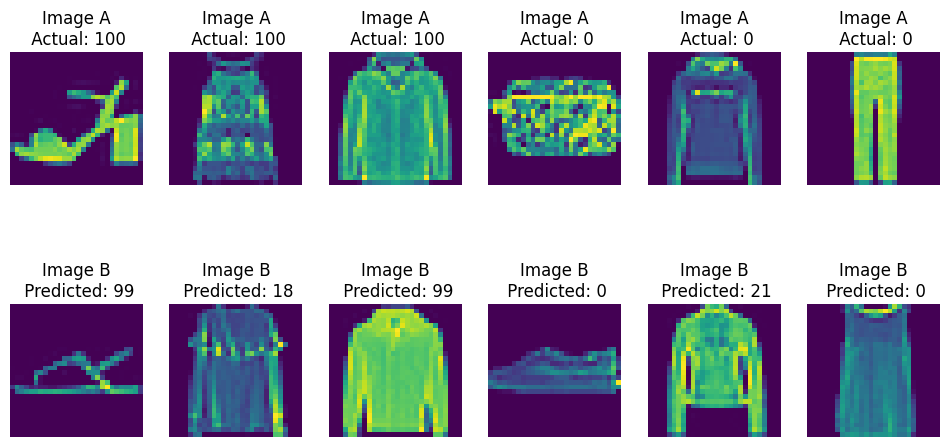

In [ ]:
import matplotlib.pyplot as plt

def show_model_output(nb_examples = 3):
    pv_a, pv_b, pv_sim = gen_random_batch(test_groups, nb_examples)
    pred_sim = siamese_model.predict([model_2.predict(pv_a), model_2.predict(pv_b)])
    fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
    for c_a, c_b, c_d, p_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, pred_sim, m_axs.T):
        ax1.imshow(c_a[:,:,0])
        ax1.set_title(f'Image A\n Actual: { 100 * c_d }')
        ax1.axis('off')
        ax2.imshow(c_b[:,:,0])
        ax2.set_title(f'Image B\n Predicted: {int( 100 * p_d[0] )}')
        ax2.axis('off')
    return fig
_ = show_model_output()

In [ ]:
from sklearn.manifold import TSNE
x_test_features = model_2.predict(x_test, verbose = True)

tsne_obj = TSNE(n_components=2,
    random_state=123,
    verbose=1)
tsne_features = tsne_obj.fit_transform(x_test_features)

313/313 [==============================] - 7s 24ms/step
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.011s...
[t-SNE] Computed neighbors for 10000 samples in 0.307s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.132393
[t-SNE] KL divergence a

In [ ]:
print(np.shape(x_test_features))

(10000, 10)


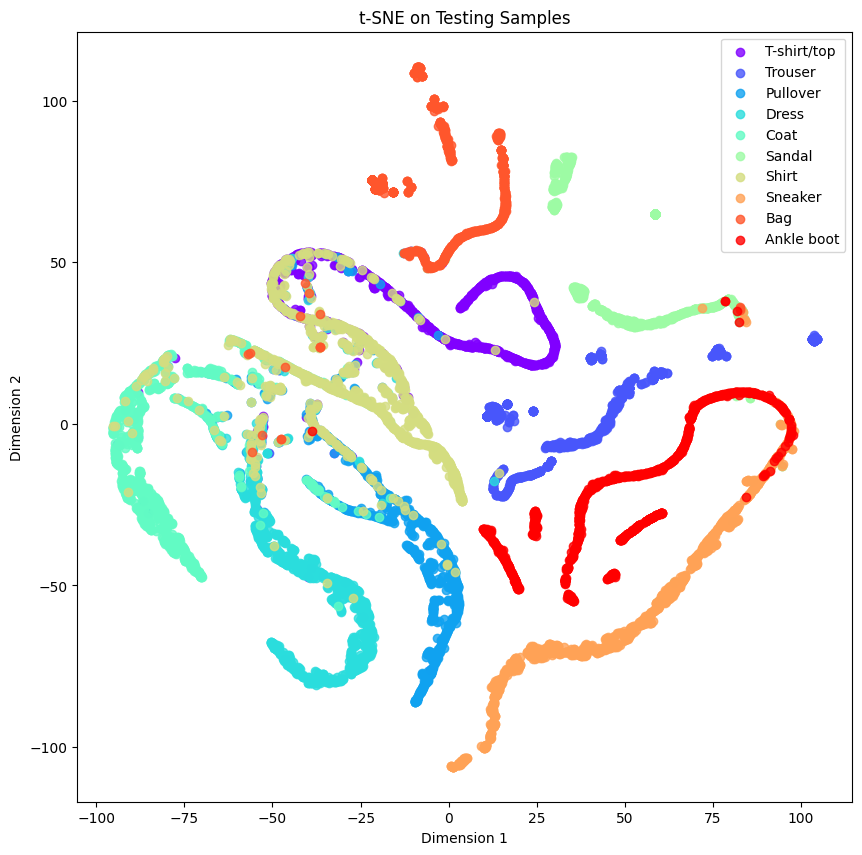

In [ ]:
obj_categories = [
                    'T-shirt/top','Trouser','Pullover','Dress',
                    'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'
                 ]
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
plt.figure(figsize=(10, 10))

for c_group, (c_color, c_label) in enumerate(zip(colors, obj_categories)):
  plt.scatter(tsne_features[np.where(y2_test == c_group), 0],
      tsne_features[np.where(y2_test == c_group), 1],
      marker='o',
      color=c_color,
      linewidth=1,
      alpha=0.8,
      label=c_label)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE on Testing Samples')
plt.legend(loc='best')
plt.savefig('clothes-dist.png')
plt.show(block=False)

In [ ]:
print(np.shape(x_train[0]))

(28, 28)


In [ ]:
pred = np.stack(x_test[1], axis=0)
pred = pred.reshape((1, 28, 28, 1))
print(y_test[1])
print(pred.shape)
np.argmax(model_2.predict(pred))

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
(1, 28, 28, 1)
1/1 [==============================] - 0s 36ms/step


2